In [9]:
!!pip install keras pydot graphviz
!pip install keras

In [18]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
import tensorflow.keras as keras
import matplotlib.pyplot as plt


In [19]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

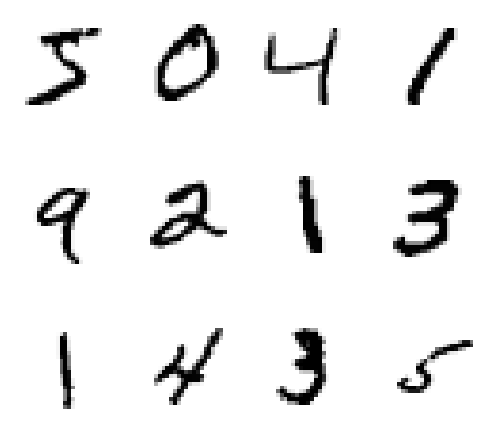

In [20]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [21]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')


In [22]:
X_train /= 255
X_valid /= 255


In [16]:
print(X_train.shape)
print(X_valid.shape)

(60000, 784)
(10000, 784)


In [23]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)


In [ ]:
print(y_train.shape)
print(y_valid.shape)

(60000, 10)
(10000, 10)


In [24]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


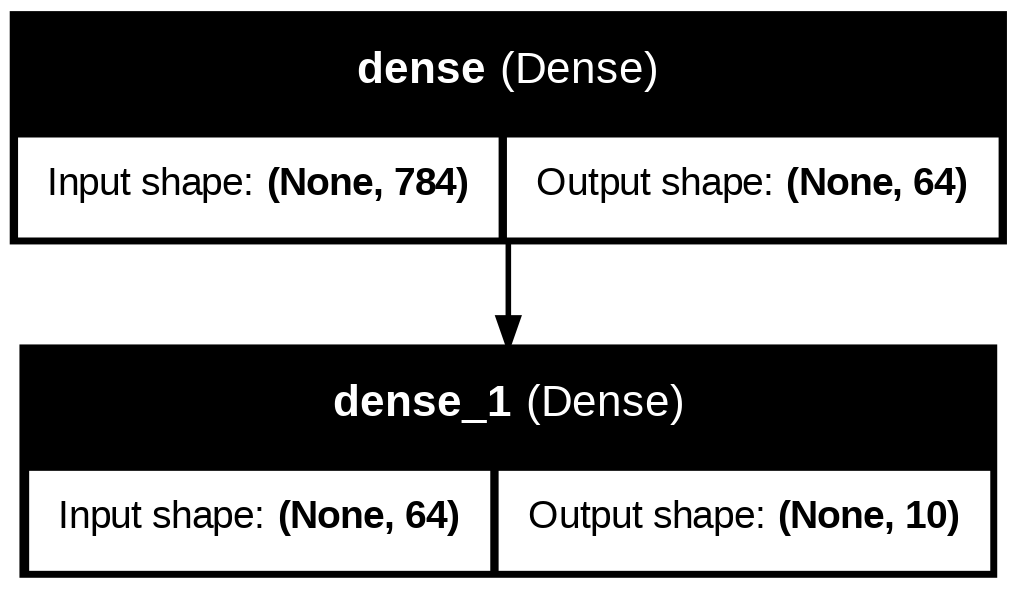

In [25]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
# Change 'lr' to 'learning_rate' in the SGD optimizer
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0450 - loss: 0.0915 - val_accuracy: 0.0500 - val_loss: 0.0910
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0555 - loss: 0.0908 - val_accuracy: 0.0769 - val_loss: 0.0905
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0803 - loss: 0.0904 - val_accuracy: 0.1079 - val_loss: 0.0901
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1050 - loss: 0.0900 - val_accuracy: 0.1293 - val_loss: 0.0897
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1298 - loss: 0.0897 - val_accuracy: 0.1521 - val_loss: 0.0894
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1556 - loss: 0.0893 - val_accuracy: 0.1796 - val_loss: 0.0891
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1841 - loss: 0.0891 - val_accuracy: 0.2119 - val_loss: 0.0888
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2140 - loss: 0.0888 - val_accu

In [27]:
model.evaluate(X_valid, y_valid)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8470 - loss: 0.0304


[0.027490997686982155, 0.8664000034332275]